# MALICIOUS URL DETECTOR

In [9]:
#Importing necessary Libraries
import pandas as pd
import itertools
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import xgboost  as xgb
from lightgbm import LGBMClassifier
import os
import seaborn as sns
from wordcloud import WordCloud
import re
from urllib.parse import urlparse
#!pip install googlesearch-python
from googlesearch import search
#!pip install tld
from urllib.parse import urlparse
from tld import get_tld
import os.path
from sklearn.preprocessing import LabelEncoder

### LOADING DATA

In [10]:
df=pd.read_csv("malicious_phish.csv")
print(df.shape)
df.head()
df.type.value_counts()

(651191, 2)


type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

### From now we'll work with wordCloud
### plotting wordcount to identify most frequent words

### Url type : Phishing

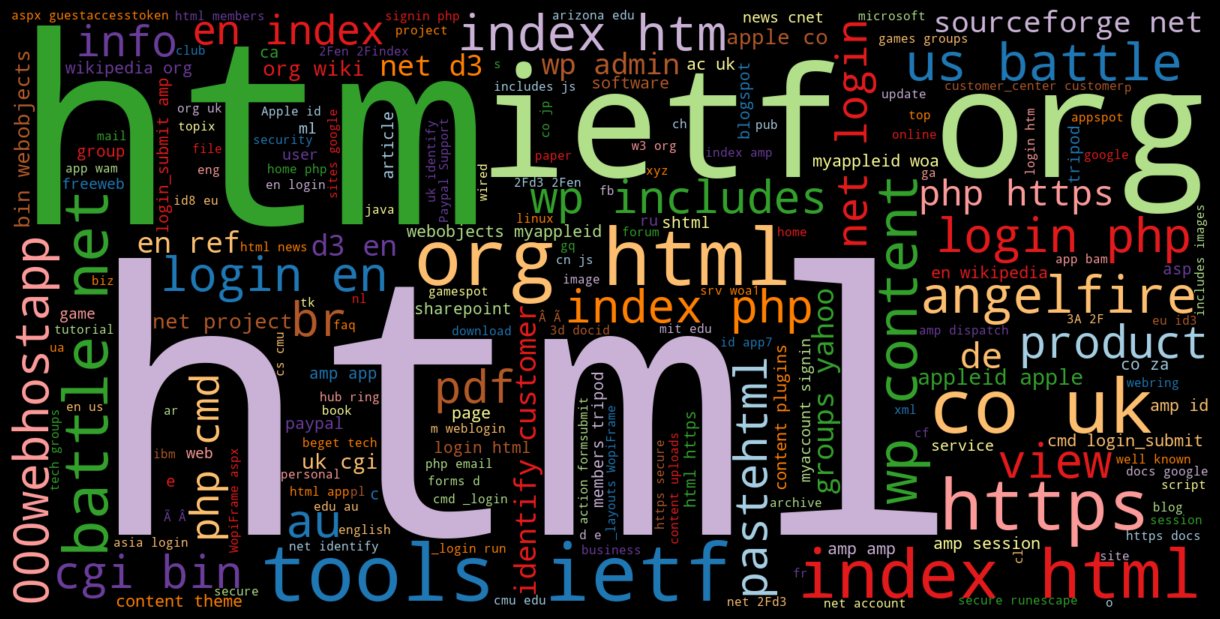

In [11]:
df_phish=df[df.type == "phishing"]
df_malware=df[df.type == "malware"]
df_deface=df[df.type == "defacement"]
df_benign=df[df.type == "benign"]


# print(df["url"]) Check whether data fetched or not 
phish_url=" ".join( i for i in df_phish.url)
wordcloud =  WordCloud(width=1600,height=800,colormap='Paired'). generate(phish_url)
plt.figure(figsize=(12,14),facecolor='k')
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Url type : Malware

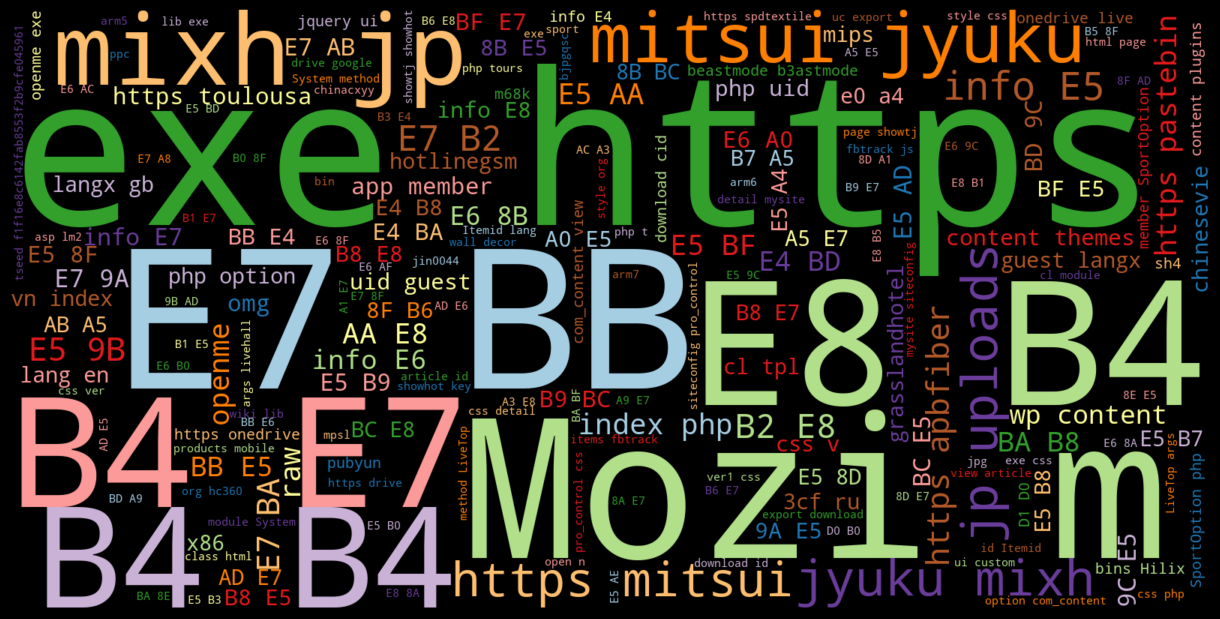

In [12]:
malware_url=" ".join(i for i in df_malware.url)
wordcloud=WordCloud(width=1600,height=800,colormap='Paired').generate(malware_url)
plt.figure(figsize=(12,14),facecolor='k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Url type : Deface

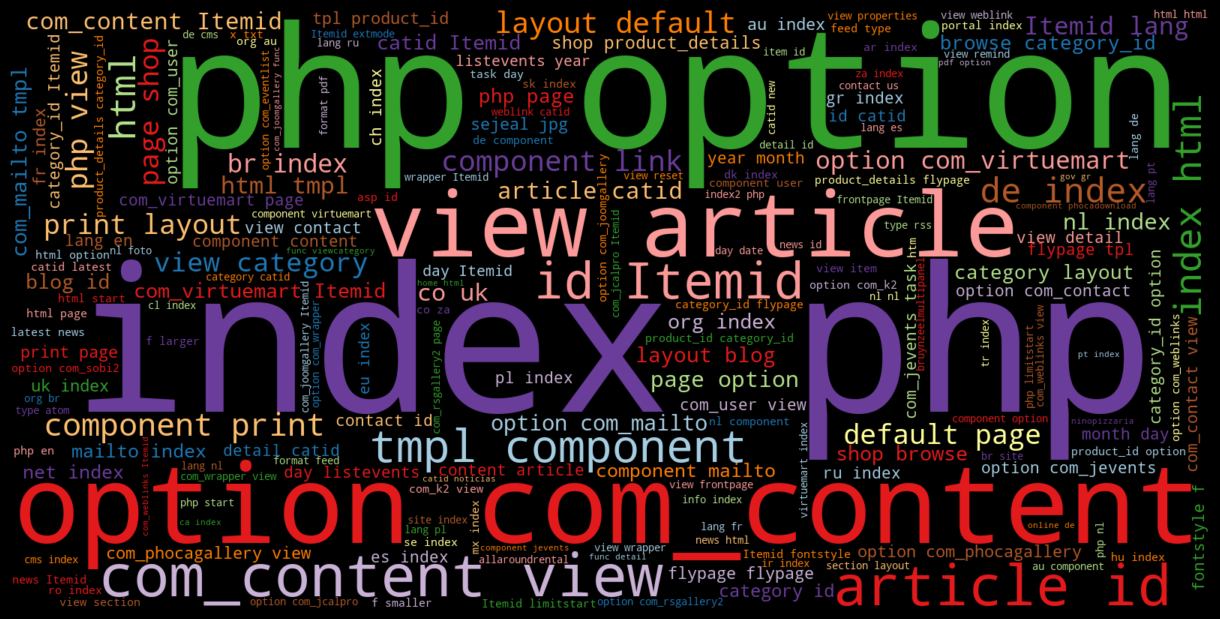

In [13]:
deface_url=" ".join(i for i in df_deface.url)
wordcloud=WordCloud(width=1600,height=800,colormap="Paired").generate(deface_url)
plt.figure(figsize=(12,14),facecolor='k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Url Type : Benign

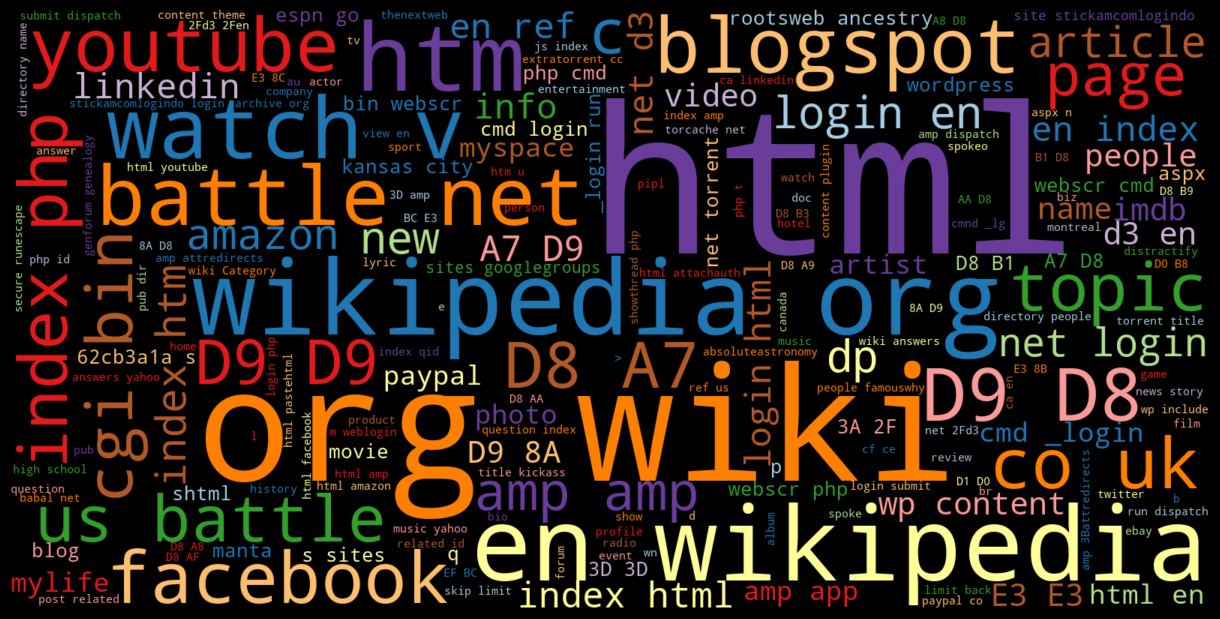

In [14]:
benign_url=" ".join(i for i in df_benign.url)
wordcloud=WordCloud(width=1600,height=800,colormap="Paired").generate(benign_url)
plt.figure(figsize=(12,14),facecolor='k')
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


#### Till now we have classified the Types of urls
#### The upcoming methods are used to analyze the all parts of a single url

#### Method for checking whether url has Ip adress or not

In [15]:
def ip_check(url):
    match=re.search(
            '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)
    if match:
        return 1
    else:
        return 0
df["use_of_ip"] = df["url"].apply(lambda i: ip_check(i))

#### Checking whether the url is abnorml or not 

In [16]:
def abnormal_url(url):
    hostname=urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname,url)
    if match:
        return 1
    else:
        return 0
df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

#### Checking url in google search

In [17]:
def google_index(url):
    site = search(url,5)
    return 1 if site else 0
df['google_index'] = df['url'].apply(lambda i: google_index(i))

#### Method counting numbers of dots in URL

In [18]:
def count_dot(url):
    count_dot=url.count('.')
    return count_dot
df['count.']  = df['url'].apply(lambda i:count_dot(i))

#### Method to count www in URL

In [19]:
def count_www(url):
    url.count("www")
    return url.count("www")
df['count-www'] = df['url'].apply(lambda i:count_www(i))

#### Method to count @ in url

In [20]:
def count_atrate(url):
    return url.count('@')
df['count@']= df['url'].apply(lambda i: count_atrate(i))

#### Method to count / in url


In [21]:
def  no_of_dir(url):
    urldir=urlparse(url).path
    return urldir.count('/')
df['count_dir']= df['url'].apply(lambda i: no_of_dir(i))

#### Method to count // in URL 


In [22]:
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')
df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))

#### Method to check whether the link is short ot not


In [23]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:9: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:9: SyntaxWarning: invalid escape sequence '\.'
C:\Users\SRINADH\AppData\Local\Temp\ipykernel_2928\2151906212.py:2: SyntaxWarning: invalid escape sequence '\.'
  match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\

#### Method to count "https" in url and some more methods too

In [25]:
def count_https(url):
    return url.count('https')

df['count-https'] = df['url'].apply(lambda i : count_https(i))

# Method to count "http" in URL
def count_http(url):
    return url.count('http')
df['count-http'] = df['url'].apply(lambda i : count_http(i))

#Method to count % in URl 
def count_per(url):
    return url.count('%')
df['count%'] = df['url'].apply(lambda i : count_per(i))


#Method to count ? in URl 

def count_ques(url):
    return url.count('?')
df['count?'] = df['url'].apply(lambda i: count_ques(i))

#Method to count - in URl 
def count_hyphen(url):
    return url.count('-')
df['count-'] = df['url'].apply(lambda i: count_hyphen(i))

#Method to count = in URL 

def count_equal(url):
    return url.count('=')
df['count='] = df['url'].apply(lambda i: count_equal(i))

#Method to count length in URL 
def url_length(url):
    return len(str(url))
df['url_length'] = df['url'].apply(lambda i: url_length(i))

#Hostname Length
def hostname_length(url):
    return len(urlparse(url).netloc)
df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))
#head() used to display the data till now we have analysed
df.head()

#### Method to check suspicious words in URL

In [ ]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))

#Method to count digits in url
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
df['count-digits']= df['url'].apply(lambda i: digit_count(i))

# Count Letters in URL
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
df['count-letters']= df['url'].apply(lambda i: letter_count(i))
df.head()


#First Directory Length in url
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0
df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

#### Length of Top Level Domain

In [33]:
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))


In [41]:
df = df.drop(1)
df.columns
df['type'].value_counts()

KeyError: '[1] not found in axis'

#### Till now we prepared method for analysing the URLs
#### Now we distribute the  Methods

# 1. Distribution of use_of_ip

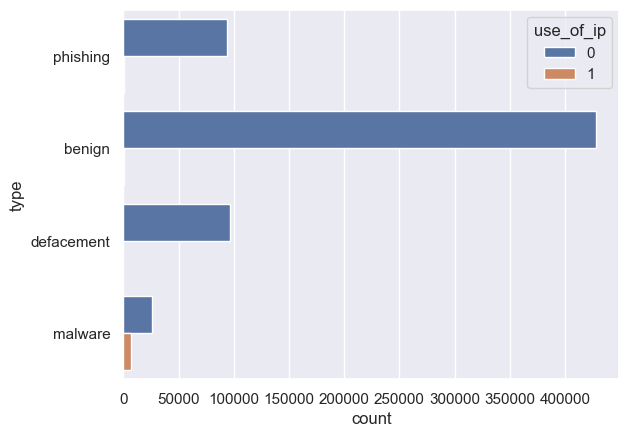

In [42]:
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="use_of_ip")

# 2. Distribution of abnormal url

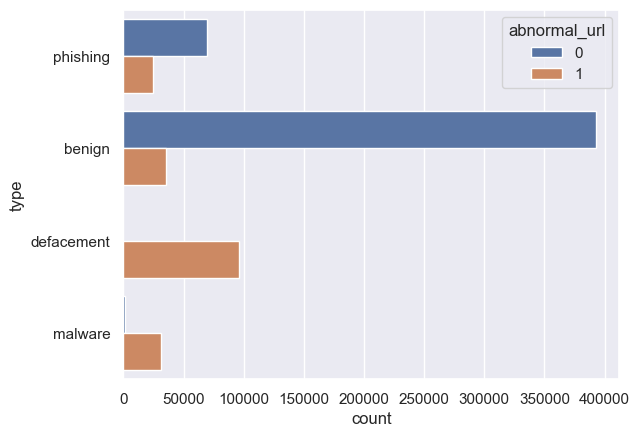

In [43]:
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="abnormal_url")

# 3. Distribution of count of [.] dot

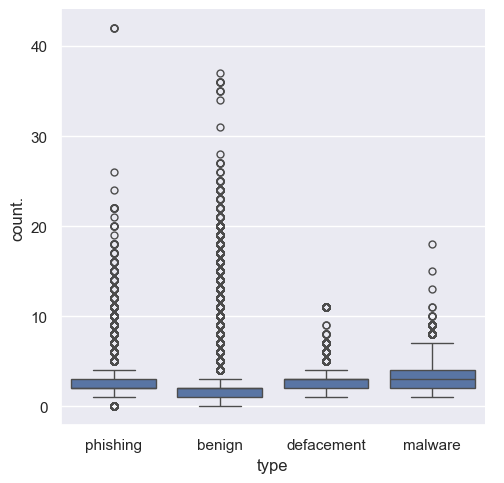

In [45]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count.", kind="box", data=df)

# 4. Distribution of count_dir

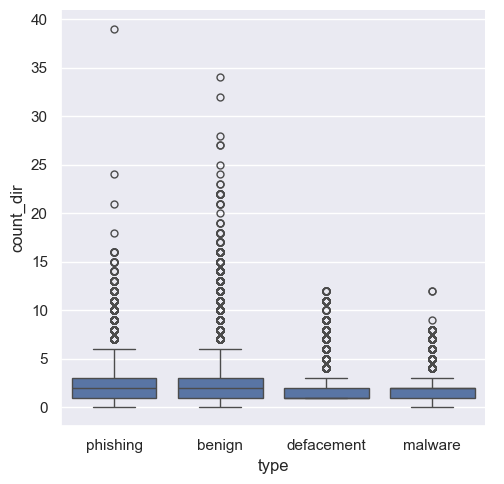

In [46]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count_dir", kind="box", data=df)

# Target Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
df["type_code"].value_counts()

type_code
0    428102
1     96457
3     94111
2     32520
Name: count, dtype: int64

# Feature & Target

In [48]:
#Predictor Variables
# filtering out google_index as it has only 1 value
X = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters']]

#Target Variable
y = df['type_code']

# Spliting Dataset - Train Test Split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

# Model Building

## 1. Random Forest Classifier

In [50]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_features='sqrt')
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test,y_pred_rf,target_names=['benign', 'defacement','phishing','malware']))

score = metrics.accuracy_score(y_test, y_pred_rf)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

      benign       0.97      0.99      0.98     85621
  defacement       0.98      0.99      0.99     19291
    phishing       0.99      0.94      0.97      6504
     malware       0.91      0.86      0.88     18822

    accuracy                           0.97    130238
   macro avg       0.96      0.95      0.95    130238
weighted avg       0.97      0.97      0.97    130238

accuracy:   0.966


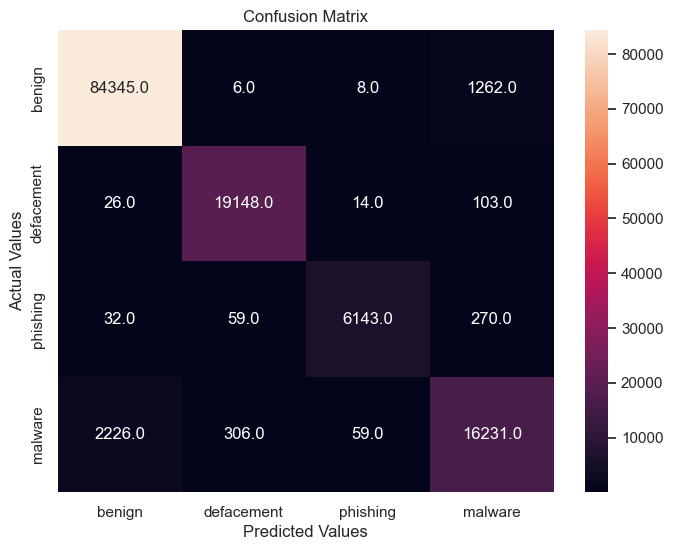

In [51]:
cm = confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'], 
                     columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

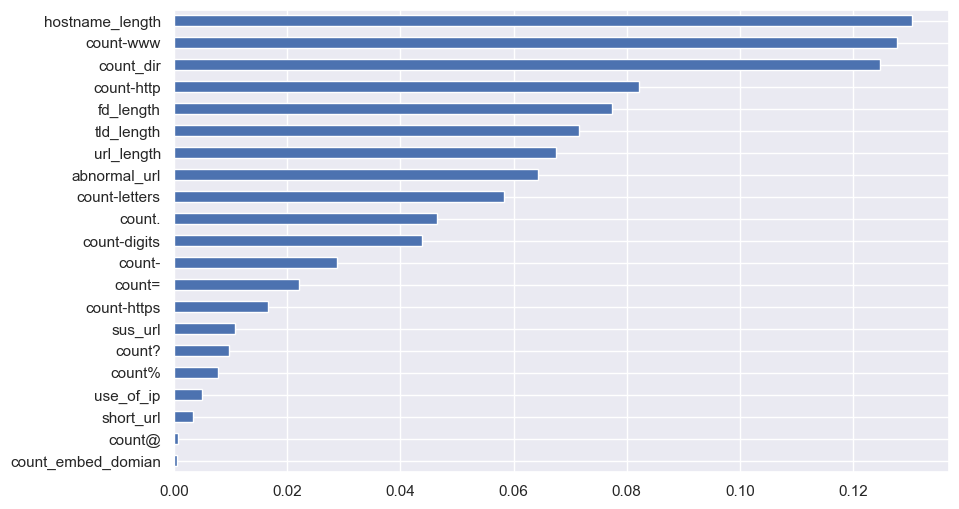

In [70]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6))
plt.show()

# Prediction

In [77]:
def main(url):
    status = []
    
    status.append(ip_check(url))
    status.append(abnormal_url(url))
    status.append(count_dot(url))
    status.append(count_www(url))
    status.append(count_atrate(url))
    status.append(no_of_dir(url))
    status.append(no_of_embed(url))
    
    status.append(shortening_service(url))
    status.append(count_https(url))
    status.append(count_http(url))
    
    status.append(count_per(url))
    status.append(count_ques(url))
    status.append(count_hyphen(url))
    status.append(count_equal(url))
    
    status.append(url_length(url))
    status.append(hostname_length(url))
    status.append(suspicious_words(url))
    status.append(digit_count(url))
    status.append(letter_count(url))
    status.append(fd_length(url))
    tld = get_tld(url,fail_silently=True)
      
    status.append(tld_length(tld))

    return status

In [81]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = rf.predict(features_test)
    if int(pred[0]) == 0:
        
        res="SAFE"
        return res
    elif int(pred[0]) == 1.0:
        
        res="DEFACEMENT"
        return res
    elif int(pred[0]) == 2.0:
        res="PHISHING"
        return res
        
    elif int(pred[0]) == 3.0:
        
        res="MALWARE"
        return res

In [88]:
urls = ['titaniumcorporate.co.za','en.wikipedia.org/wiki/North_Dakota',]
url=input("Paste The Url here :")


print(get_prediction_from_url(url))
        
# expecting "MALWARE","SAFE"

Paste The Url here : en.wikipedia.org/wiki/North_Dakota


SAFE


C:\Users\SRINADH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
